created by Claude
not saving plot results

Looking at your code, I can see that you're already saving the data to a file called 'data_IVentu-Ventd-0Vsd_tr350_77K.txt' with the format: V2, V1, Current. Here's a Python script to read and plot that data:This script provides several features:

## Main Features:

1. **`plot_voltage_sweep_data()`** - The main plotting function that:
   - Reads your data file with format: V2, V1, Current
   - Groups data by V2 values
   - Plots Current vs V1 curves for each V2 value
   - Uses different colors for each V2 curve
   - Includes proper labels and legend

2. **`analyze_data_statistics()`** - Provides detailed statistics about your data

3. **`plot_3d_surface()`** - Optional 3D visualization of the data

## How to use:

1. Save this code as a Python file (e.g., `plot_data.py`)
2. Make sure the data file `data_IVentu-Ventd-0Vsd_tr350_77K.txt` is in the same directory
3. Run the script:

```python
python plot_data.py
```

## Key Features:

- **Automatic data grouping**: Groups measurements by V2 values
- **Proper sorting**: Ensures V1 values are sorted for clean line plots
- **Color coding**: Each V2 curve gets a different color
- **Statistics**: Shows data ranges and measurement counts
- **Error handling**: Handles missing files gracefully
- **Customizable**: Easy to modify plot appearance and add features

The plot will show current vs V1 curves, with each curve representing a different V2 value, which matches exactly what your measurement code is designed to produce.

Data loaded successfully. Shape: (250, 3)
Number of V2 values: 5
V2 range: 0.000 V to 0.400 V
V1 range: -1.500 V to -0.520 V
Current range: 9.920000e-04 A to 6.027530e-01 A


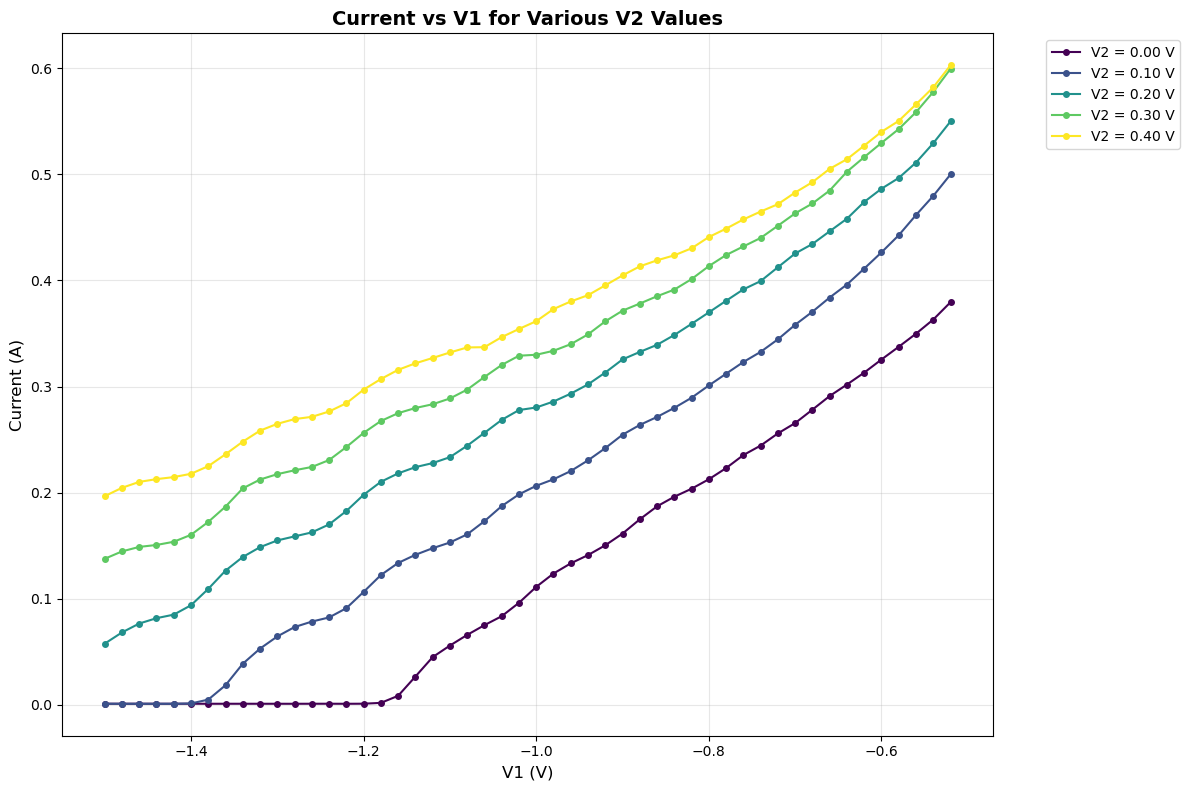

Could not load data for analysis

Plotting complete!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_voltage_sweep_data(filename='data_IV_202507020936.txt'):
    """
    Plot current vs V1 curves for various V2 values from the saved data file.
    
    Parameters:
    filename (str): Path to the data file
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: V2, V1 (voltage), Current
    V2_values = data[:, 0]
    V1_values = data[:, 1]  
    currents = data[:, 2]
    
    # Group data by V2 values
    data_by_V2 = defaultdict(lambda: {'V1': [], 'current': []})
    
    for v2, v1, current in zip(V2_values, V1_values, currents):
        data_by_V2[v2]['V1'].append(v1)
        data_by_V2[v2]['current'].append(current)
    
    # Sort V2 keys for consistent plotting
    sorted_V2_keys = sorted(data_by_V2.keys())
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each V2 curve
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_V2_keys)))
    
    for i, v2 in enumerate(sorted_V2_keys):
        V1_sorted = np.array(data_by_V2[v2]['V1'])
        current_sorted = np.array(data_by_V2[v2]['current'])
        
        # Sort by V1 to ensure proper line plotting
        sort_indices = np.argsort(V1_sorted)
        V1_sorted = V1_sorted[sort_indices]
        current_sorted = current_sorted[sort_indices]
        
        plt.plot(V1_sorted, current_sorted, '-o', 
                color=colors[i], 
                label=f'V2 = {v2:.2f} V',
                markersize=4,
                linewidth=1.5)
    
    # Formatting
    plt.xlabel('V1 (V)', fontsize=12)
    plt.ylabel('Current (A)', fontsize=12)
    plt.title('Current vs V1 for Various V2 Values', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Show statistics
    print(f"Number of V2 values: {len(sorted_V2_keys)}")
    print(f"V2 range: {min(sorted_V2_keys):.3f} V to {max(sorted_V2_keys):.3f} V")
    print(f"V1 range: {min(V1_values):.3f} V to {max(V1_values):.3f} V")
    print(f"Current range: {min(currents):.6e} A to {max(currents):.6e} A")
    
    plt.show()
    
    return data_by_V2

def plot_3d_surface(filename='data_IVentu-Ventd-0Vsd_tr350_77K.txt'):
    """
    Create a 3D surface plot of the data (optional visualization)
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for 3D plot")
        return
    
    from mpl_toolkits.mplot3d import Axes3D
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=20, alpha=0.6)
    
    ax.set_xlabel('V1 (V)')
    ax.set_ylabel('V2 (V)')
    ax.set_zlabel('Current (A)')
    ax.set_title('3D View: Current vs V1 and V2')
    
    plt.colorbar(scatter, shrink=0.5, aspect=20, label='Current (A)')
    plt.show()

def analyze_data_statistics(filename='data_IVentu-Ventd-0Vsd_tr350_77K.txt'):
    """
    Print detailed statistics about the measurement data
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for analysis")
        return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    print("=== Data Analysis ===")
    print(f"Total data points: {len(data)}")
    print(f"Unique V2 values: {len(np.unique(V2_values))}")
    print(f"V2 values: {np.unique(V2_values)}")
    print(f"V1 range: {np.min(V1_values):.3f} to {np.max(V1_values):.3f} V")
    print(f"Current statistics:")
    print(f"  Mean: {np.mean(currents):.6e} A")
    print(f"  Std:  {np.std(currents):.6e} A")
    print(f"  Min:  {np.min(currents):.6e} A")
    print(f"  Max:  {np.max(currents):.6e} A")

if __name__ == "__main__":
    # Main plotting function
    data_dict = plot_voltage_sweep_data()
    
    # Optional: Show statistics
    analyze_data_statistics()
    
    # Optional: Create 3D plot (uncomment if desired)
    # plot_3d_surface()
    
    print("\nPlotting complete!")

created by Claude
saving plot results as a pdf file

Absolutely! I'll modify the code to save the plot as a PDF file. Here's the updated version:Perfect! Now the code will automatically save your plot as a high-quality PDF file. Here are the key changes:

## New Features:

1. **Automatic PDF saving**: The plot is saved as PDF by default
2. **High quality**: 300 DPI resolution for publication-quality figures
3. **Auto-generated filename**: Creates PDF filename based on your data file name
4. **Custom filename option**: You can specify your own PDF filename if needed

## Usage Examples:

**Basic usage (saves PDF automatically):**
```python
data_dict = plot_voltage_sweep_data()
```
This will create: `data_IV_plot.pdf`

**Custom PDF filename:**
```python
data_dict = plot_voltage_sweep_data(pdf_filename="my_measurement_results.pdf")
```

**Don't save PDF (just display):**
```python
data_dict = plot_voltage_sweep_data(save_pdf=False)
```

## Output Files:

- **Main plot**: `data_IV_plot.pdf`
- **3D plot** (if enabled): `data_IVentu-Ventd-0Vsd_tr350_77K_3D_plot.pdf`

## PDF Features:

- **High resolution**: 300 DPI for crisp, publication-ready figures
- **Vector format**: PDF preserves quality at any zoom level
- **Tight bounding box**: No unnecessary white space around the plot
- **Embedded fonts**: Text will display correctly on any system

The PDF will be saved in the same directory as your script, and you'll see a confirmation message when it's saved successfully!

Data loaded successfully. Shape: (15, 3)
Plot saved as: data_IV_plot.pdf
Number of V2 values: 3
V2 range: 0.000 V to 0.200 V
V1 range: -1.000 V to -0.200 V
Current range: 5.671000e-03 A to 7.166000e-03 A


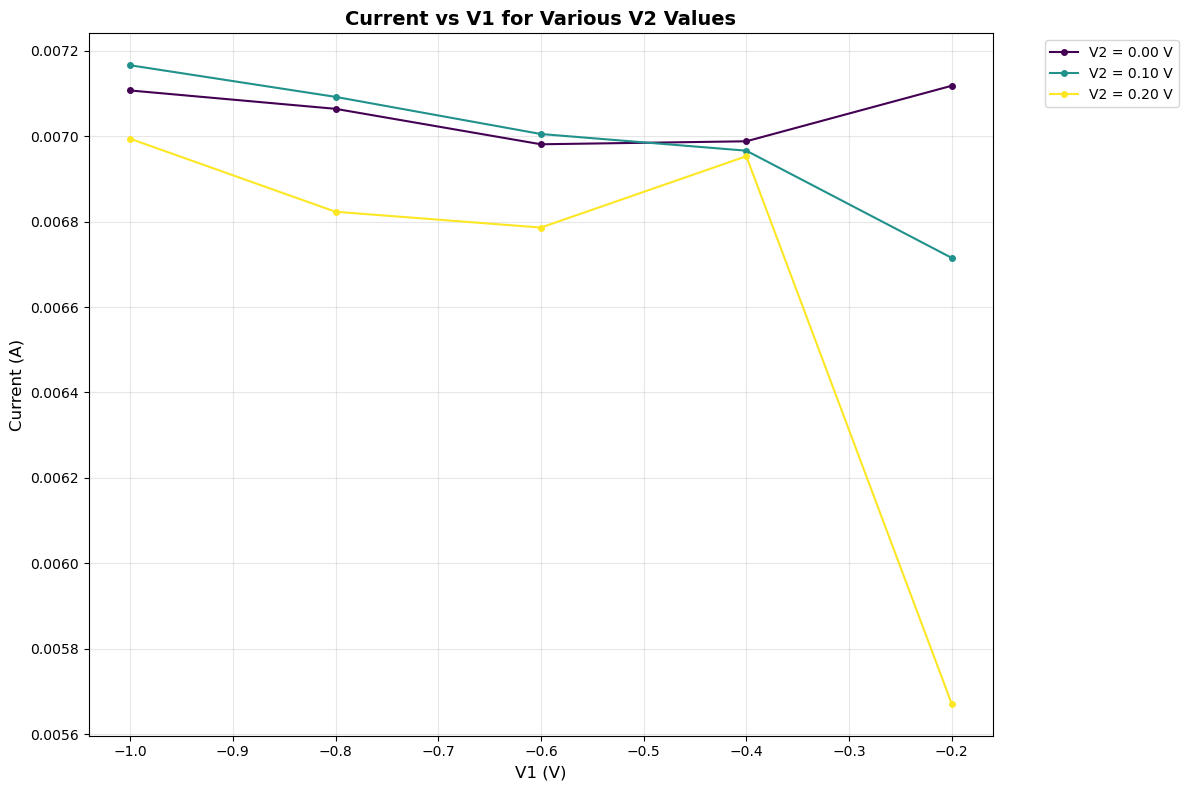

=== Data Analysis ===
Total data points: 15
Unique V2 values: 3
V2 values: [0.  0.1 0.2]
V1 range: -1.000 to -0.200 V
Current statistics:
  Mean: 5.899933e-03 A
  Std:  3.051198e-04 A
  Min:  5.007000e-03 A
  Max:  6.375000e-03 A

Plotting complete! PDF file has been saved.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_voltage_sweep_data(filename='data_IV.txt', save_pdf=True, pdf_filename=None):
    """
    Plot current vs V1 curves for various V2 values from the saved data file.
    
    Parameters:
    filename (str): Path to the data file
    save_pdf (bool): Whether to save the plot as PDF
    pdf_filename (str): Name of the PDF file (auto-generated if None)
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: V2, V1 (voltage), Current
    V2_values = data[:, 0]
    V1_values = data[:, 1]  
    currents = data[:, 2]
    
    # Group data by V2 values
    data_by_V2 = defaultdict(lambda: {'V1': [], 'current': []})
    
    for v2, v1, current in zip(V2_values, V1_values, currents):
        data_by_V2[v2]['V1'].append(v1)
        data_by_V2[v2]['current'].append(current)
    
    # Sort V2 keys for consistent plotting
    sorted_V2_keys = sorted(data_by_V2.keys())
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each V2 curve
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_V2_keys)))
    
    for i, v2 in enumerate(sorted_V2_keys):
        V1_sorted = np.array(data_by_V2[v2]['V1'])
        current_sorted = np.array(data_by_V2[v2]['current'])
        
        # Sort by V1 to ensure proper line plotting
        sort_indices = np.argsort(V1_sorted)
        V1_sorted = V1_sorted[sort_indices]
        current_sorted = current_sorted[sort_indices]
        
        plt.plot(V1_sorted, current_sorted, '-o', 
                color=colors[i], 
                label=f'V2 = {v2:.2f} V',
                markersize=4,
                linewidth=1.5)
    
    # Formatting
    plt.xlabel('V1 (V)', fontsize=12)
    plt.ylabel('Current (A)', fontsize=12)
    plt.title('Current vs V1 for Various V2 Values', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save as PDF if requested
    if save_pdf:
        if pdf_filename is None:
            # Auto-generate filename based on data filename
            base_name = filename.replace('.txt', '').replace('.dat', '')
            pdf_filename = f"{base_name}_plot.pdf"
        
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {pdf_filename}")
    
    # Show statistics
    print(f"Number of V2 values: {len(sorted_V2_keys)}")
    print(f"V2 range: {min(sorted_V2_keys):.3f} V to {max(sorted_V2_keys):.3f} V")
    print(f"V1 range: {min(V1_values):.3f} V to {max(V1_values):.3f} V")
    print(f"Current range: {min(currents):.6e} A to {max(currents):.6e} A")
    
    plt.show()
    
    return data_by_V2

def plot_3d_surface(filename='data_IVentu-Ventd-0Vsd_tr350_77K.txt', save_pdf=False):
    """
    Create a 3D surface plot of the data (optional visualization)
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for 3D plot")
        return
    
    from mpl_toolkits.mplot3d import Axes3D
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=20, alpha=0.6)
    
    ax.set_xlabel('V1 (V)')
    ax.set_ylabel('V2 (V)')
    ax.set_zlabel('Current (A)')
    ax.set_title('3D View: Current vs V1 and V2')
    
    plt.colorbar(scatter, shrink=0.5, aspect=20, label='Current (A)')
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_3D_plot.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"3D plot saved as: {pdf_filename}")
    
    plt.show()

def analyze_data_statistics(filename='data_IVentu-Ventd-0Vsd_tr350_77K.txt'):
    """
    Print detailed statistics about the measurement data
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for analysis")
        return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    print("=== Data Analysis ===")
    print(f"Total data points: {len(data)}")
    print(f"Unique V2 values: {len(np.unique(V2_values))}")
    print(f"V2 values: {np.unique(V2_values)}")
    print(f"V1 range: {np.min(V1_values):.3f} to {np.max(V1_values):.3f} V")
    print(f"Current statistics:")
    print(f"  Mean: {np.mean(currents):.6e} A")
    print(f"  Std:  {np.std(currents):.6e} A")
    print(f"  Min:  {np.min(currents):.6e} A")
    print(f"  Max:  {np.max(currents):.6e} A")

if __name__ == "__main__":
    # Main plotting function - saves PDF by default
    data_dict = plot_voltage_sweep_data(save_pdf=True)
    
    # Optional: Show statistics
    analyze_data_statistics()
    
    # Optional: Create 3D plot and save as PDF (uncomment if desired)
    # plot_3d_surface(save_pdf=True)
    
    print("\nPlotting complete! PDF file has been saved.")